In [106]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the figure suptitle
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [107]:

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma, ur=0, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.ur = ur
        self.dt = dt    # Time step
        self.reset()

    def reset(self):
        self.voltage = self.ur  # Initial membrane potential

    def update(self, I):
        # Membrane potential update using Euler method
        dv = (self.ur-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        # Check for spike
        if self.voltage >= self.threshold:
            self.reset()
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma,ur=0, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma,ur, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        spike = neuron.update(I)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


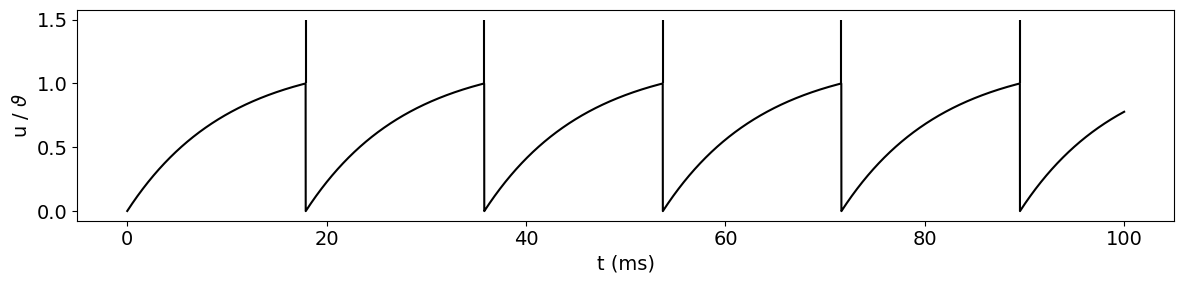

In [126]:
# Simulation parameters
tau = 10  # Membrane time constant (ms)
R = 1  # Membrane resistance
threshold = 1  # Firing threshold
sigma = 0  # Amplitude of the noise (in units of voltage)
dt = 0.01 # Time step (ms)
ur= 0
duration = 100  # Duration of simulation (ms)
I = 1.2 # Input current (arbitrary units)

spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, ur, dt, duration)

plt.figure(figsize=(12, 3))
plt.vlines(spikes, ymin=threshold, ymax=threshold+(abs(ur-threshold)/2), colors='black', linestyles='-')
plt.plot(np.arange(0, duration, dt), voltages, color='black')
plt.xlabel('t (ms)')
plt.ylabel('u / $\\vartheta$')
#plt.title(f'$I={I*1e12}$ pA, $\\tau={tau}$ ms, $R={R/1e9}$ M$\Omega$, $\\vartheta={threshold}$ mV')
#plt.ylim(-0.5, 2.5)
#plt.title('Membrane Potential over Time')

plt.tight_layout()
plt.savefig('u_deterministic.png')
plt.show()
